In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

lover_colors = {
    'Pink': '#FFB6C1',
    'LightBlue': '#ADD8E6',
    'Lavender': '#E6E6FA',
    'LemonChiffon': '#FFFACD',
    'HotPink': '#FF69B4',
    'LightSkyBlue': '#87CEFA',
    'Gold': '#FFD700'
}

def set_lover_style(style='whitegrid'):
    """
    Configura el estilo de los gráficos con la paleta de colores 'lover'.
    
    Args:
    style (str): Estilo de fondo para los gráficos de seaborn.
    """
    # Configurar el estilo de seaborn
    sns.set_style(style)
    
    # Crear una paleta de colores personalizada
    sns.set_palette(list(lover_colors.values()))
    
    # Configurar los colores para matplotlib
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=lover_colors.values())

def get_lover_color(color_name):
    """
    Obtiene el código hexadecimal del color especificado.
    
    Args:
    color_name (str): Nombre del color en la paleta 'lover'.
    
    Returns:
    str: Código hexadecimal del color.
    """
    return lover_colors.get(color_name, '#000000')  # Negro por defecto si el color no existe

# Ejemplo de uso
set_lover_style()


---
title: "Ejemplo Regresión Lineal vs Modelo Causal"
author: "Cinthya Leonor Vergara Silva"
date: "2024-08-23"
format: html
---


**INDICE**

---

[PARTE I](#partei)

1. [Marco Teórico Regresiones](#marcoteorico)

   a. [Regresion Lineal Simple](#simple)

   
   b. [Regresión Ridge](#ridge)


   c. [Regresión Lasso](#lasso)


   d. [Comparación Modelos](#comparacion)

   e. [Regresion Multivariada](#regresion_multivariada)

[PARTE II](#parteii)
1. [Modelos Causales](#sec_modelo_causal)
   a. [Variables Instrumentales en 2 etapas](#)
2. [Modelos con Contrafactuales](#sec_modelo_contrafactual)



<a id='partei'></a>
# PARTE 1

***

<a id='marcoteorico'></a>
# Marco Teórico de Regresiones

<a id='simple'></a>
## 1. Regresión Lineal Simple

La **regresión lineal simple** es una técnica estadística que busca modelar la relación entre una variable dependiente y una o más variables independientes mediante una línea recta (en el caso de una variable independiente) o un hiperplano (en el caso de múltiples variables). El modelo se expresa matemáticamente como:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon$$

Donde:
- $y$ es la variable dependiente.
- $x_1, x_2, \ldots, x_n$ son las variables independientes.
- $\beta_0$ es el intercepto.
- $\beta_1, \beta_2, \ldots, \beta_n$ son los coeficientes que representan la relación entre cada predictor y la variable dependiente.
- $\epsilon$ es el término de error.

El objetivo de la regresión lineal es minimizar el error cuadrático medio (MSE) entre las predicciones del modelo y los valores reales de la variable dependiente. A pesar de su simplicidad, es una herramienta poderosa para identificar y cuantificar relaciones lineales, aunque puede ser sensible a la multicolinealidad y a los valores atípicos.

La Regresión Lineal puede ser simple, cuando solamente tenemos una sola variable independiente para realizar la predicción, o múltiple,cuando se manejan múltiples variables independientes que contribuyen a la variable dependiente. na herramienta poderosa para identificar y cuantificar relaciones lineales, aunque puede ser sensible a la multicolinealidad y a los valores atípicos.

<a id='ridge'></a>
## 2. Regresión Ridge

La **regresión Ridge** es una variante de la regresión lineal que introduce un término de penalización sobre el tamaño de los coeficientes para mitigar el problema de la multicolinealidad y mejorar la generalización del modelo. La función objetivo en la regresión Ridge es:

$$\text{Minimizar} \quad \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 $$

Donde:
- $\lambda$ es el parámetro de regularización que controla la magnitud de la penalización.
- $\sum_{j=1}^{p} \beta_j^2$ es el término de regularización que penaliza los coeficientes grandes.

A medida que $\lambda$ aumenta, los coeficientes se reducen, lo que reduce la varianza del modelo a costa de un poco de sesgo. Ridge es especialmente útil en contextos donde las variables predictoras están altamente correlacionadas o cuando se dispone de un gran número de predictores en comparación con las observaciones.

<a id='lasso'></a>
## 3. Regresión Lasso


La **regresión Lasso (Least Absolute Shrinkage and Selection Operator)** es otra variante de la regresión lineal que, al igual que Ridge, introduce un término de penalización, pero en este caso basado en la suma de los valores absolutos de los coeficientes. La función objetivo en Lasso es:

$$ \text{Minimizar} \quad \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j|$$

Lasso no solo reduce la magnitud de los coeficientes, sino que puede llevar algunos coeficientes a cero, lo que implica una selección automática de variables. Este aspecto lo hace particularmente útil cuando se trabaja con un gran número de predictores, permitiendo simplificar el modelo al eliminar aquellos que tienen poca o ninguna relevancia. Sin embargo, esto también puede introducir un sesgo si el valor de $\lambda$ no se selecciona cuidadosamente.

<a id='comparacion'></a>
## Comparación y Aplicaciones

- **Regresión Lineal Simple**: Es útil cuando la relación entre las variables es clara y lineal, y no se espera multicolinealidad.
- **Ridge**: Es preferible cuando hay colinealidad entre las variables independientes y se necesita un modelo que generalice mejor.
- **Lasso**: Es ideal para modelos con muchas variables, especialmente cuando se sospecha que algunas no tienen un impacto significativo en la variable dependiente, ya que puede realizar selección de variables de manera automática.
- 
### Supuestos:
1. Linealidad: La relación entre $X$ e $Y$ es lineal.
2. Independencia: Las observaciones son independientes entre sí.
3. Homocedasticidad: La varianza del error es constante.
4. Normalidad: Los errores se distribuyen normalmente.

### Limitaciones:
- Ignora otras variables relevantes (como depredadores).
- Asume una relación causal simple que puede no existir.
- No puede capturar relaciones no lineales.

<a id='regresion_multivariada'></a>
## 2. Regresión Multivariada

### Modelo:
$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_k X_k + \epsilon$$

Donde:
- Y es la variable dependiente (población de aves)
- $X_1, X_2,  \dots , X_k$ son las variables independientes (alimento, depredadores)
- $\beta_0, \beta_1, \beta_2, \dots, \beta_k$ son los coeficientes de regresión
- $\epsilon$ es el término de error

### Supuestos:
Mismos que la regresión simple, más:
5. No multicolinealidad: Las variables independientes no están altamente correlacionadas entre sí.

### Limitaciones:
- Puede sufrir de multicolinealidad, afectando la interpretación de los coeficientes.
- No resuelve problemas de endogeneidad o causalidad inversa.
- Sigue asumiendo relaciones lineales.

## Ejemplo 

Ejemplo en Python utilizando statsmodels que demuestre los cuatro tipos de modelos, basándonos en los datos simulados. Este ejemplo ayudará a ilustrar cómo los modelos lineales pueden llevar a conclusiones incorrectas y no siempre pueden asegurar causalidad.

Este código realiza los cuatro tipos de análisis:

1. Regresión simple univariada:
   Este modelo sólo considera la relación entre la población de aves y el alimento. Aunque muestra una relación positiva significativa, ignora completamente el efecto de los depredadores, lo que puede llevar a conclusiones incompletas o sesgadas.

2. Regresión multivariada:
   Este modelo incluye tanto el alimento como los depredadores. Aunque proporciona una imagen más completa, aún puede haber problemas de endogeneidad o variables omitidas. Además, la multicolinealidad entre variables independientes puede afectar la interpretación de los coeficientes.

3. Modelo de Inferencia Causal con Variables Instrumentales:
   Utilizamos la política ambiental como variable instrumental para los depredadores. Este enfoque intenta abordar la posible endogeneidad entre depredadores y población de aves. Sin embargo, la validez de este método depende de la fuerza y exogeneidad del instrumento.

4. Modelo de Inferencia Causal con Contrafactuales:
   Simulamos un escenario donde no hay depredadores para estimar su efecto causal. Aunque este enfoque puede ser intuitivo, se basa en fuertes supuestos sobre la estructura del modelo y puede no capturar completamente las complejidades del sistema ecológico real.

## Limitaciones y conclusiones:

1. Causalidad vs. Correlación: Los modelos lineales muestran relaciones, pero no prueban causalidad. Por ejemplo, la relación entre alimento y población de aves podría ser bidireccional.

2. Variables omitidas: Pueden existir factores importantes no incluidos en el modelo, como el clima o las enfermedades, que afecten a la población de aves.

3. No linealidad: Las relaciones ecológicas a menudo son no lineales, lo que los modelos lineales no pueden capturar adecuadamente.

4. Endogeneidad: La población de aves podría influir en la cantidad de depredadores, creando un problema de causalidad inversa que los modelos simples no abordan.

5. Supuestos del modelo: Todos estos modelos hacen supuestos sobre la distribución de errores y la forma funcional de las relaciones, que pueden no cumplirse en la realidad.

6. Interpretación de coeficientes: En presencia de multicolinealidad o variables instrumentales, la interpretación directa de los coeficientes puede ser engañosa.


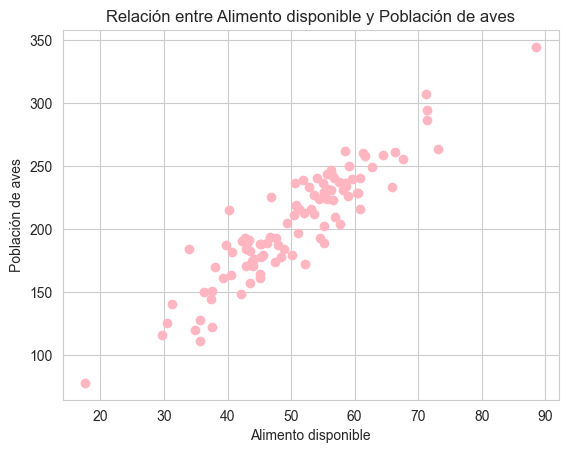

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.gmm import IV2SLS
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Configuración inicial
np.random.seed(42)
n = 100

# Generamos variables
politica = np.random.normal(0, 1, n)
depredadores = 2 * politica + np.random.normal(0, 1, n)
alimento = np.random.normal(50, 10, n)
poblacion_aves = 4 * alimento - 8 * depredadores + np.random.normal(0, 7, n)

# Creamos el DataFrame
data = pd.DataFrame({
    'Alimento': alimento,
    'Poblacion': poblacion_aves,
    'Depredadores': depredadores,
    'Politica': politica
})

# Visualizamos los datos
plt.scatter(data['Alimento'], data['Poblacion'])
plt.xlabel('Alimento disponible')
plt.ylabel('Población de aves')
plt.title('Relación entre Alimento disponible y Población de aves')
plt.show()


# Modelo de regresión lineal
<a id='simple'></a>

*** 

**OBSERVACIÓN IMPORTANTE:** este tipo de análisis no asegura causalidad en el modelo. 

En el siguiente ejemplo veremos cómo se relaciona la **"Población"** simulada con respecto a la variable **"Alimento"**

1. Regresión simple univariada (Población ~ Alimento)
                            OLS Regression Results                            
Dep. Variable:              Poblacion   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     539.6
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           1.22e-41
Time:                        22:31:12   Log-Likelihood:                -427.15
No. Observations:                 100   AIC:                             858.3
Df Residuals:                      98   BIC:                             863.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

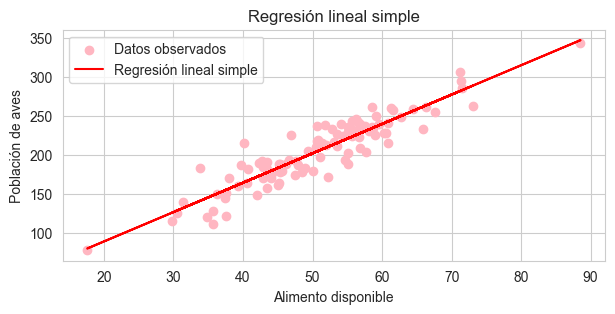

In [3]:
# 1. Regresión simple univariada
print("1. Regresión simple univariada (Población ~ Alimento)")
X = sm.add_constant(data['Alimento'])
y = data['Poblacion']
modelo_simple = sm.OLS(y, X).fit()
print(modelo_simple.summary())

# Predicciones del modelo de regresión lineal simple
data['Pred_simple'] = modelo_simple.predict(X)

# Graficamos los datos y la línea de regresión simple
plt.figure(figsize=(7, 3))
plt.scatter(data['Alimento'], data['Poblacion'], label='Datos observados')#, color='blue')
plt.plot(data['Alimento'], data['Pred_simple'], color='red', label='Regresión lineal simple')
plt.xlabel('Alimento disponible')
plt.ylabel('Población de aves')
plt.title('Regresión lineal simple')
plt.legend()
plt.show()


# Modelo Multivariado 

Veamos qué pasa cuando agregamos la variable de **"Depredadores"** al DataFrame



2. Regresión multivariada (Población ~ Alimento + Depredadores)
                            OLS Regression Results                            
Dep. Variable:              Poblacion   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2527.
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           2.16e-84
Time:                        22:31:12   Log-Likelihood:                -322.18
No. Observations:                 100   AIC:                             650.4
Df Residuals:                      97   BIC:                             658.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

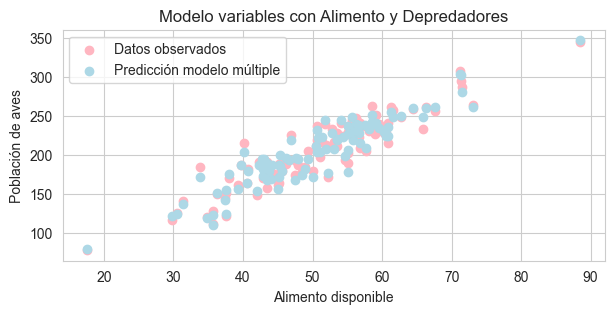

In [4]:
# Predicciones del modelo de regresión múltiple 


# 2. Regresión multivariada
print("\n2. Regresión multivariada (Población ~ Alimento + Depredadores)")
X = sm.add_constant(data[['Alimento', 'Depredadores']])
y = data['Poblacion']
modelo_multi = sm.OLS(y, X).fit()
print(modelo_multi.summary())


data['Pred_multi'] = modelo_multi.predict(X)

# Graficamos los datos y las predicciones del modelo
plt.figure(figsize=(7, 3))
plt.scatter(data['Alimento'], data['Poblacion'], label='Datos observados')#, color='blue')
plt.scatter(data['Alimento'], data['Pred_multi'], label='Predicción modelo múltiple')#, color='green')
plt.xlabel('Alimento disponible')
plt.ylabel('Población de aves')
plt.title('Modelo variables con Alimento y Depredadores')
plt.legend()
plt.show()


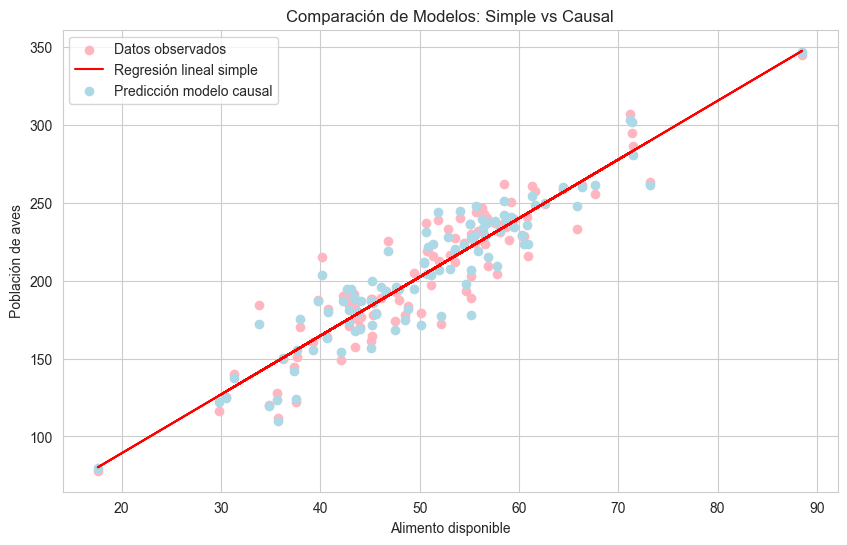

In [5]:
# Comparación de las predicciones de ambos modelos
plt.figure(figsize=(10, 6))
plt.scatter(data['Alimento'], data['Poblacion'], label='Datos observados')#, color='pink')
plt.plot(data['Alimento'], data['Pred_simple'], color='red', label='Regresión lineal simple')
plt.scatter(data['Alimento'], data['Pred_multi'], label='Predicción modelo causal')#, color='lightblue')
plt.xlabel('Alimento disponible')
plt.ylabel('Población de aves')
plt.title('Comparación de Modelos: Simple vs Causal')
plt.legend()
plt.show()


In [6]:
# Comprobación de multicolinealidad
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nFactores de Inflación de Varianza (VIF):")
print(vif_data)


Factores de Inflación de Varianza (VIF):
       Variable        VIF
0         const  23.788329
1      Alimento   1.026699
2  Depredadores   1.026699


<a id='parteii'></a>
# PARTE II

*** 

<a id='sec_modelo_causal'></a>
# Análisis Comparativo: OLS vs. Inferencia Causal con Variables Instrumentales

Mostraremos cómo una regresión lineal simple puede fallar en capturar una relación causal y cómo el análisis contrafactual puede mejorar la explicación.


***

## Introducción

Exploremos ahora cómo un modelo de regresión lineal simple (OLS) puede no capturar correctamente la relación causal entre variables cuando hay endogeneidad. Para abordar este problema, utilizaremos un modelo de inferencia causal utilizando variables instrumentales (IV). 

## Problema de Endogeneidad

El problema de endogeneidad surge en modelos de regresión cuando una o más de las variables explicativas están correlacionadas con el término de error. Esta correlación viola uno de los supuestos fundamentales del modelo de regresión lineal clásico, que establece que las variables explicativas deben ser exógenas, es decir, no deben estar correlacionadas con el término de error.

### Consecuencias de la Endogeneidad

Cuando la endogeneidad está presente, las estimaciones obtenidas mediante Mínimos Cuadrados Ordinarios (OLS) son **sesgadas** e **inconsistentes**. Esto significa que:
- **Sesgo**: Las estimaciones no reflejan el verdadero efecto de las variables explicativas sobre la variable dependiente.
- **Inconsistencia**: A medida que aumenta el tamaño de la muestra, las estimaciones no convergen al valor real del parámetro.

### Causas Comunes de Endogeneidad

Existen varias razones por las cuales la endogeneidad puede surgir:

1. **Variables omitidas**: Si falta una variable relevante que afecta tanto a la variable dependiente como a una de las variables explicativas, la omisión de esta variable puede inducir una correlación entre la variable explicativa y el error.
   
2. **Causalidad inversa**: Ocurre cuando la variable dependiente influye en la variable explicativa. En este caso, el modelo no captura la dirección correcta de la causalidad.
   
3. **Error de medición**: Si una variable explicativa está medida con error, este error puede inducir una correlación con el término de error.

### Solución mediante Variables Instrumentales

Para abordar el problema de endogeneidad, se utilizan **variables instrumentales (IV)**. Un instrumento es una variable que:
- Está correlacionada con la variable explicativa problemática (relevancia).
- No está correlacionada con el término de error (exogeneidad).

Al utilizar un instrumento adecuado, es posible estimar el efecto causal real de la variable explicativa sobre la variable dependiente, mitigando el sesgo causado por la endogeneidad.



# Explicación del Modelo IV2SLS
***
El modelo de Mínimos Cuadrados en Dos Etapas (IV2SLS, por sus siglas en inglés) es una técnica utilizada en econometría para estimar relaciones causales cuando las variables explicativas están correlacionadas con el término de error, lo que viola los supuestos del modelo de regresión lineal clásico.

Supongamos que estamos interesados en estimar la relación entre una variable dependiente $Y$ y una variable explicativa $X$, pero $X$ está correlacionada con el error (problema de Endogeneidad) que denotaremos como $\varepsilon$:

$$Y = \beta_0 + \beta_1 X + \varepsilon$$

Esta correlación entre $X$ y $\varepsilon$ causa el problema de endogeneidad, lo que lleva a estimaciones sesgadas e inconsistentes de $\beta_1$ cuando se utiliza la técnica de mínimos cuadrados ordinarios (OLS).

### Solución: Variables Instrumentales (IV)

Para resolver este problema, se introduce una variable instrumental \( Z \), que debe cumplir con dos condiciones clave:

1. **Relevancia:** $Z$ debe estar correlacionada con la variable explicativa endógena $X$.
2. **Exogeneidad:** $Z$ no debe estar correlacionada con el término de error $\varepsilon$.

### Mínimos Cuadrados en Dos Etapas (2SLS)

El método 2SLS estima los coeficientes en dos etapas:

1. **Primera etapa:** Regresión de la variable endógena $X$ sobre los instrumentos $Z$ y cualquier otra variable exógena. Esto produce valores predichos $\hat{X}$ que no están correlacionados con el término de error $\varepsilon$.

$$X = \pi_0 + \pi_1 Z + u$$

2. **Segunda etapa:** Regresión de la variable dependiente $Y$ sobre los valores predichos $\hat{X}$ obtenidos en la primera etapa.

$$Y = \beta_0 + \beta_1 \hat{X} + \eta$$

con $\eta$ (eta) representa el nuevo término de error en la regresión de la variable dependiente $Y$ sobre los valores predichos $\hat{X}$.

Aquí está un desglose más detallado:

- **$Y = \beta_0 + \beta_1 \hat{X} + \eta$**:  Esta es la ecuación estimada en la segunda etapa del 2SLS.
-  $\beta_0$es el intercepto.
-  $\beta_1$ es el coeficiente que queremos estimar, el cual refleja el efecto causal de $\hat{X}$ (la versión ``purificada'' o predicha de $X$ que no está correlacionada con el error) sobre $Y$.
-   $\hat{X}$ son los valores predichos de $X$ obtenidos en la primera etapa, utilizando el instrumento $Z$.
-   $\eta$ es el término de error en esta segunda regresión. 

### Naturaleza de $\eta$:

- **No correlacionado con $\hat{X}$**: Dado que $\hat{X}$ está construido de tal manera que no está correlacionado con el término de error original $\varepsilon$, $\eta$ también debería ser no correlacionado con $\hat{X}$, lo cual es crucial para que las estimaciones de $\beta_1$ sean consistentes.
  
- **Incluye tanto el error original $\varepsilon$ como el error de predicción de la primera etapa**: $\eta$ es una combinación del error original $\varepsilon$ y cualquier error asociado con la estimación de $X$ en la primera etapa. Sin embargo, gracias a la construcción del modelo, estos errores no afectan la consistencia de $\beta_1$.

Por lo tanto, $\eta$ representa las desviaciones de $Y$ que no pueden ser explicadas por $\hat{X}$, y se espera que no esté correlacionado con las variables que estamos utilizando para la predicción, asegurando la validez del modelo estimado.


### Modelo:
Primera etapa: $X = γ₀ + γ₁Z + υ$

Segunda etapa: $Y = β₀ + β₁X̂ + ε$

Donde:
- Z es la variable instrumental (política ambiental)
- $\hat X$ es la estimación de X de la primera etapa

### Supuestos:
1. Relevancia: Z está correlacionada con X.
2. Exogeneidad: Z no está correlacionada con ε.
3. Restricción de exclusión: Z afecta a Y solo a través de X.

### Limitaciones:
- La validez depende de la calidad del instrumento.
- Puede producir estimaciones imprecisas si el instrumento es débil.
- Sigue asumiendo relaciones lineales.


### Aplicación en el Ejemplo

En el ejemplo, la variable dependiente es `Población`, la variable endógena es `Depredadores`, y la variable instrumental es `Política`. El modelo IV2SLS permite estimar el efecto causal de `Depredadores` en `Población` controlando la endogeneidad mediante el uso de `Política` como un instrumento válido.

En este caso, se compararán los resultados obtenidos con ambos enfoques.



In [7]:
# 3. Modelo de Inferencia Causal con Variables Instrumentales
print("\n3. Modelo de Inferencia Causal con Variables Instrumentales")
from statsmodels.sandbox.regression.gmm import IV2SLS

# Definimos las variables
X = data[['Depredadores', 'Alimento']]  # Variables explicativas endógenas
y = data['Poblacion']  # Variable dependiente
Z = data[['Politica', 'Depredadores']]  # Variables instrumentales

# Añadimos una constante
X = sm.add_constant(X)
Z = sm.add_constant(Z)

# Ajustar el modelo IV (2SLS)
modelo_iv = IV2SLS(y, X, instrument=Z).fit()

# Imprimir el resumen del modelo
print(modelo_iv.summary())




3. Modelo de Inferencia Causal con Variables Instrumentales
                          IV2SLS Regression Results                           
Dep. Variable:              Poblacion   R-squared:                       0.977
Model:                         IV2SLS   Adj. R-squared:                  0.976
Method:                     Two Stage   F-statistic:                     113.5
                        Least Squares   Prob (F-statistic):           3.99e-26
Date:                Sun, 01 Sep 2024                                         
Time:                        22:31:13                                         
No. Observations:                 100                                         
Df Residuals:                      97                                         
Df Model:                           2                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

# 4. Modelo de Inferencia Causal con Contrafactuales
***
### Concepto:
Compara el resultado observado con un resultado hipotético bajo diferentes condiciones.

### Supuestos:
1. Ignorabilidad: No hay variables no observadas que afecten tanto al tratamiento como al resultado.
2. Valor de tratamiento estable de unidad (SUTVA): El tratamiento de una unidad no afecta el resultado de otras unidades.

### Limitaciones:
- Depende de fuertes supuestos sobre la estructura del modelo.
- Puede no capturar completamente la complejidad de sistemas ecológicos reales.
- La validez de las inferencias depende de la similitud entre el escenario contrafactual y la realidad.



In [8]:
# 4. Modelo de Inferencia Causal con Contrafactuales
# Función para ajustar los datos contrafactuales
def ajustar_datos_contrafactuales(data, depredadores=0):
    data_cf = data.copy()
    data_cf['Depredadores'] = depredadores
    
    # Recalculamos la población de aves basándonos en la fórmula original
    # pero con depredadores = 0
    data_cf['Poblacion'] = 2 * data_cf['Alimento'] - 10 * data_cf['Depredadores'] + np.random.normal(0, 10, len(data))
    
    return data_cf

# Simulamos un escenario contrafactual donde no hay depredadores
data_cf = ajustar_datos_contrafactuales(data, depredadores=0)

# Preparamos los datos para la predicción
X = sm.add_constant(data[['Depredadores', 'Alimento']])
X_cf = sm.add_constant(data_cf[['Depredadores', 'Alimento']])

# Ajustamos el modelo con los datos originales
modelo_cf = sm.OLS(data['Poblacion'], X).fit()

# Realizamos la predicción contrafactual
y_cf = modelo_cf.predict(X_cf)

print(modelo_cf.summary())

# Comparamos los resultados
print("Promedio de la población de aves en datos originales:", data['Poblacion'].mean())
print("Promedio de la población de aves en el contrafactual:", data_cf['Poblacion'].mean())
print("Promedio de la predicción contrafactual:", y_cf.mean())

                            OLS Regression Results                            
Dep. Variable:              Poblacion   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2527.
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           2.16e-84
Time:                        22:31:13   Log-Likelihood:                -322.18
No. Observations:                 100   AIC:                             650.4
Df Residuals:                      97   BIC:                             658.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1544      3.005     -0.051   

## Conclusiones Generales

1. **Causalidad vs. Correlación**: Ninguno de estos modelos prueba causalidad de manera definitiva. La causalidad requiere consideraciones teóricas y diseños experimentales.

2. **Complejidad del Mundo Real**: Los sistemas ecológicos son a menudo no lineales y tienen múltiples interacciones que estos modelos lineales no capturan adecuadamente.

3. **Endogeneidad**: Problemas como la causalidad inversa (por ejemplo, la población de aves afectando a los depredadores) no se resuelven completamente con estos métodos.

4. **Validez de los Supuestos**: La violación de los supuestos puede llevar a inferencias incorrectas.

5. **Interpretación Cuidadosa**: Los coeficientes y las relaciones observadas deben interpretarse con cautela, considerando las limitaciones de cada modelo.

6. **Necesidad de Métodos Avanzados**: Para capturar relaciones más complejas, pueden ser necesarios métodos no lineales, análisis de series temporales o técnicas de aprendizaje automático.


Esta explicación teórica proporciona una base sólida para entender los modelos que hemos utilizado y sus limitaciones. Algunos puntos clave a destacar son:

1. **Progresión de complejidad**: Vemos cómo cada modelo sucesivo intenta abordar las limitaciones del anterior, pero introduce sus propios desafíos y supuestos.

2. **Importancia de los supuestos**: Cada modelo se basa en supuestos específicos que, si se violan, pueden llevar a conclusiones erróneas.

3. **Causalidad vs. correlación**: Aunque los modelos más avanzados intentan acercarse a la inferencia causal, ninguno puede establecer causalidad de manera definitiva sin consideraciones teóricas adicionales o diseños experimentales.

4. **Complejidad del mundo real**: Los sistemas ecológicos, como la dinámica de población de aves, son a menudo demasiado complejos para ser capturados completamente por modelos lineales simples.

5. **Limitaciones de la linealidad**: Todos estos modelos asumen relaciones lineales, lo cual puede ser una simplificación excesiva en muchos casos reales.

6. **Endogeneidad y variables omitidas**: Estos son problemas persistentes que pueden afectar la validez de las inferencias en todos los modelos presentados.


In [9]:
# Imprimir coeficientes
print("Coeficientes del modelo OLS:")
print(modelo_multi.params)
print("\nCoeficientes del modelo IV:")
print(modelo_iv.params)


# Coeficientes teóricos
coef_teoricos = {
    'Alimento': 4,
    'Depredadores': 8
}

# Coeficientes estimados del modelo completo
coef_estimados_multi = modelo_multi.params
coef_estimados_iv= modelo_iv.params

# Porcentaje de diferencia con respecto a los coeficientes teóricos
def calcular_diferencia_percent(coef_estimados, coef_teoricos):
    diferencias = {}
    for variable, coef_teorico in coef_teoricos.items():
        coef_estimado = abs(coef_estimados.get(variable, None))
        if coef_estimado is not None:
            diferencia = ((coef_estimado - coef_teorico) / coef_teorico) * 100
            diferencias[variable] = diferencia
    return diferencias

diferencias_multi = calcular_diferencia_percent(coef_estimados_multi, coef_teoricos)
diferencias_iv = calcular_diferencia_percent(coef_estimados_iv, coef_teoricos)


# Crear un DataFrame para visualizar las diferencias
df_diferencias = pd.DataFrame({
    'Variable': coef_teoricos.keys(),
    'Diferencia % Modelo OLS': [diferencias_multi.get(var, np.nan) for var in coef_teoricos.keys()],
    'Diferencia % Modelo 2S-IV': [diferencias_iv.get(var, np.nan) for var in coef_teoricos.keys()],
    'R^2': [modelo_multi.rsquared,modelo_iv.rsquared]
})

print("Diferencias porcentuales entre coeficientes estimados y teóricos:")
df_diferencias

Coeficientes del modelo OLS:
const          -0.154423
Alimento        4.015786
Depredadores   -8.554286
dtype: float64

Coeficientes del modelo IV:
const           14.001556
Depredadores    -8.302284
Alimento         3.737216
dtype: float64
Diferencias porcentuales entre coeficientes estimados y teóricos:


,Variable,Diferencia % Modelo OLS,Diferencia % Modelo 2S-IV,R^2
0,Alimento,0.39465,-6.569589,0.981167
1,Depredadores,6.92858,3.778545,0.976666


In [10]:
((modelo_iv.params.get("Depredadores")-8)/8)*100

np.float64(-203.77854484103065)